In [1]:
#!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc('font', size=12)

In [4]:
# bar plot

barplot = {'Dataset': ['IDK-MRC', 'IDK-MRC', 'TyDI-QA-ID', 'TyDI-QA-ID', 'SQuAD-ID', 'SQuAD-ID'],
        'Model': ['Baseline', 'indonli', 'Baseline', 'indonli', 'Baseline', 'indonli'],
        'F1': [84.25128, 83.4219, 76.47617, 74.66427, 67.07638, 56.91996]}

barplot_df = pd.DataFrame(barplot)
barplot_df

,Dataset,Model,F1
0,IDK-MRC,Baseline,84.25128
1,IDK-MRC,indonli,83.42190
2,TyDI-QA-ID,Baseline,76.47617
3,TyDI-QA-ID,indonli,74.66427
4,SQuAD-ID,Baseline,67.07638
5,SQuAD-ID,indonli,56.91996


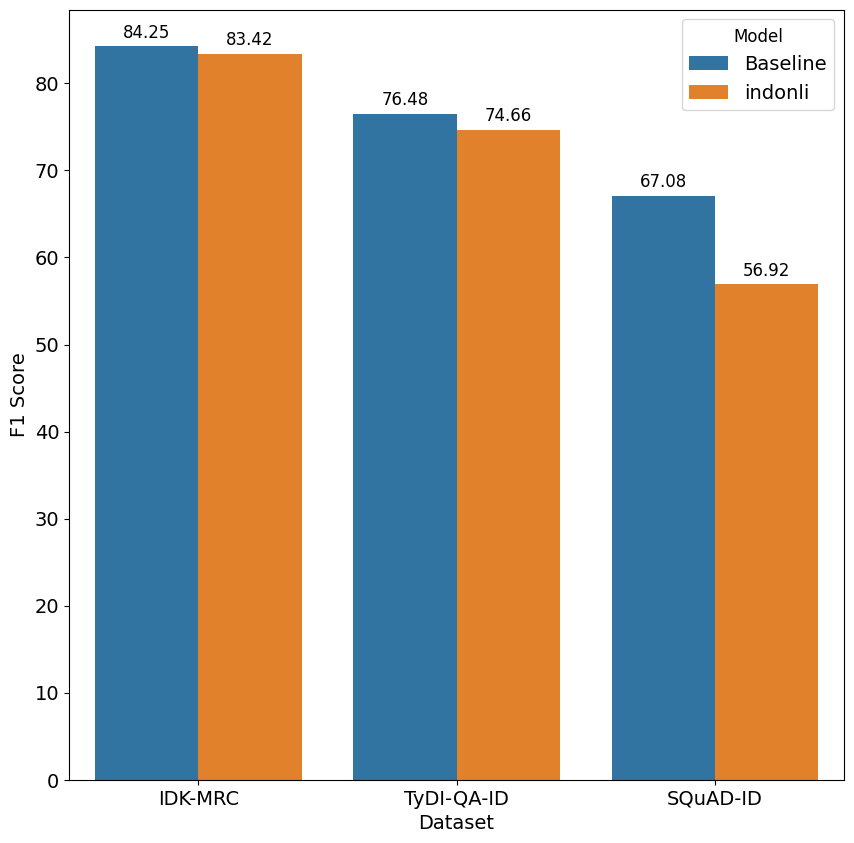

In [5]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Dataset', y='F1', hue='Model', data=barplot_df)

# Menambahkan nilai-y di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    if height != 0.0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.ylabel('F1 Score', fontsize=14)
plt.legend(title='Model', title_fontsize='12')

plt.savefig('bar_plot_for_metric-based.png', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
data = pd.read_csv('raw_main_table_metric.csv')
#data.replace('BL', 0, inplace=True)
data = data[data['MSC'] != 'Baseline']
data = data[data['MSC'] != 'indonli']
data = data[data['MSC'] != 'indonli_mnli']

def convert_to_float(value):
    try:
        return float(value.replace(',', '.')) if isinstance(value, str) and value != '#DIV/0!' else float(value)
    except ValueError:
        return 0

data.loc[:, data.columns.difference(['Dataset', 'MSC'])] = data.loc[:, data.columns.difference(['Dataset', 'MSC'])].applymap(convert_to_float)

int_column = ['TQ', 'TS', 'MSI', 'VA', 'RA', 'RR', 'WA', 'WR']
data[int_column] = data[int_column].astype(int)

data

,Dataset,MSC,TQ,TS,MSI,VA,TH,EM,F1,RA,RR,WA,WR,Trade off
13,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,1,0.00,75.82938,84.16834,639,1,201,3,3.000000
14,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.25,75.82938,84.16834,639,1,201,3,3.000000
15,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.50,75.82938,84.16834,639,1,201,3,3.000000
16,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.75,75.94787,84.16834,639,1,198,6,6.000000
17,idkmrc,indonli_mnli_idkmrc-nli,1,4,2,1,0.00,61.49289,70.76557,514,126,168,36,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,squadid,indonli_mnli_squadid-nli,2,4,3,2,0.50,47.76383,67.01314,5657,32,6016,168,5.250000
143,squadid,indonli_mnli_squadid-nli,2,4,3,2,0.75,47.51116,66.82728,5609,80,5833,351,4.387500
144,squadid,indonli_mnli_squadid-nli,2,4,3,3,0.25,47.78068,67.03771,5659,30,6019,165,5.500000
145,squadid,indonli_mnli_squadid-nli,2,4,3,3,0.50,47.78068,67.03771,5659,30,6019,165,5.500000


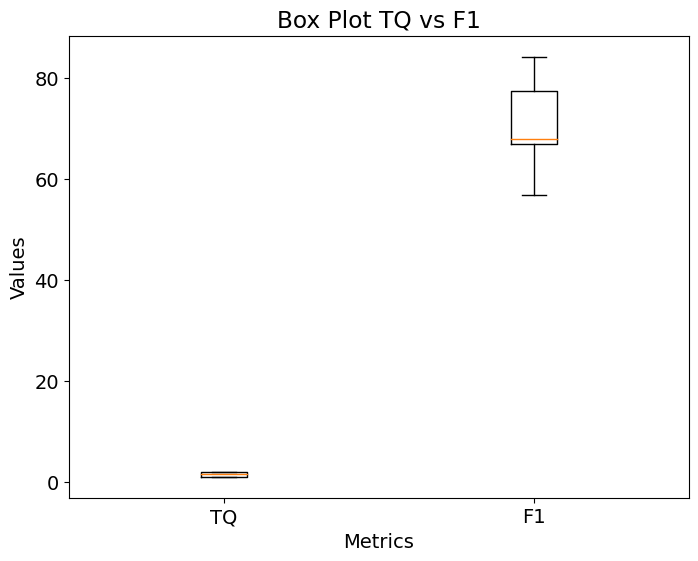

In [7]:
plt.figure(figsize=(8, 6))
plt.boxplot([data['TQ'], data['F1']], labels=['TQ', 'F1'])
plt.title('Box Plot TQ vs F1')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

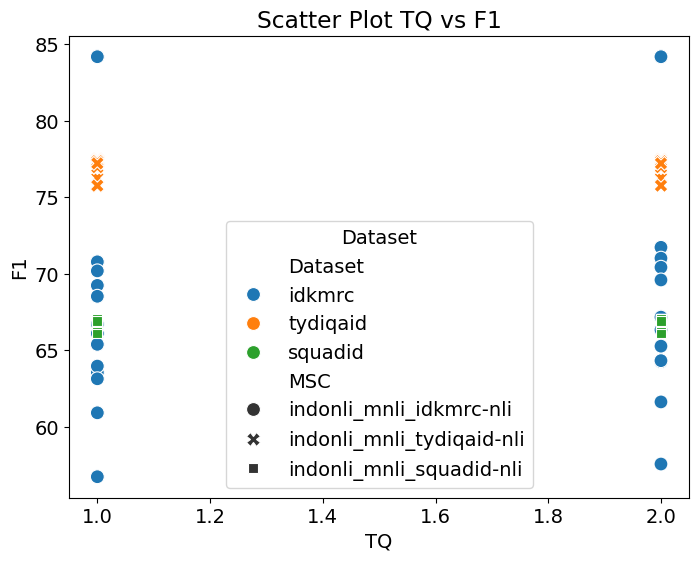

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TQ', y='F1', data=data, hue='Dataset', style='MSC', s=100)
plt.title('Scatter Plot TQ vs F1')
plt.xlabel('TQ')
plt.ylabel('F1')
plt.legend(title='Dataset')
plt.show()

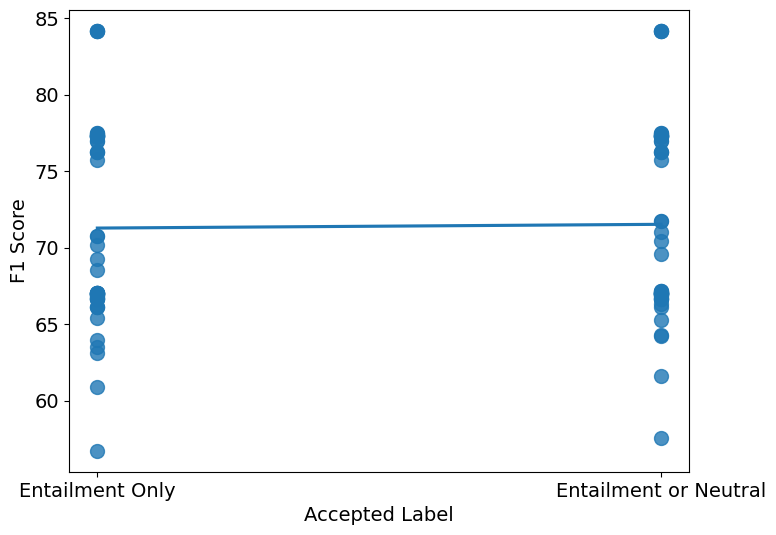

In [9]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 6))
sns.regplot(x='TQ', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Accepted Label', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

plt.xticks([1, 2], ['Entailment Only', 'Entailment or Neutral'])

plt.savefig('regplot_tq_f1.png', dpi=300, bbox_inches='tight')
plt.show()

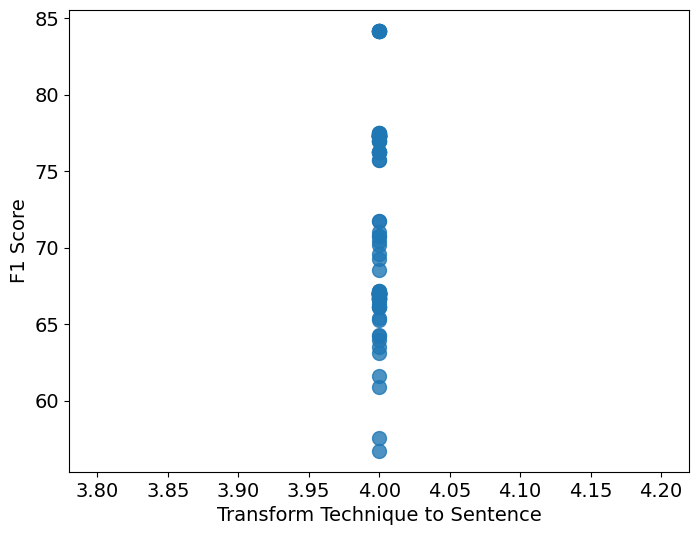

In [10]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 6))
sns.regplot(x='TS', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Transform Technique to Sentence', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.show()

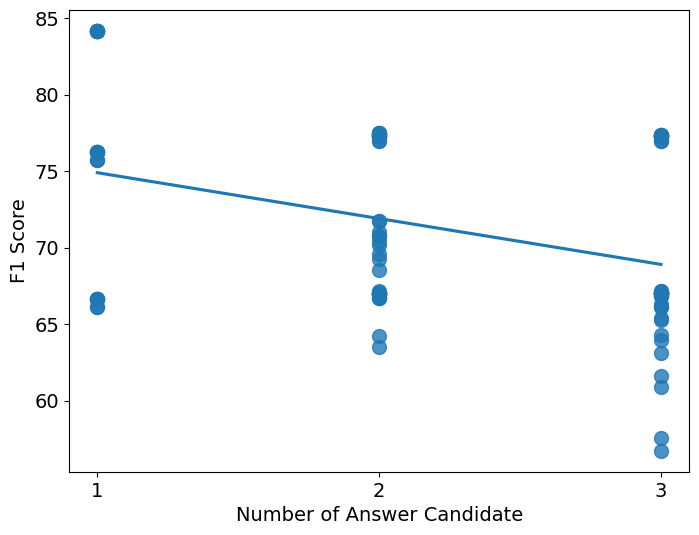

In [11]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 6))
sns.regplot(x='MSI', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Number of Answer Candidate', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

plt.xticks([1, 2, 3])

plt.savefig('regplot_msi_f1.png', dpi=300, bbox_inches='tight')
plt.show()

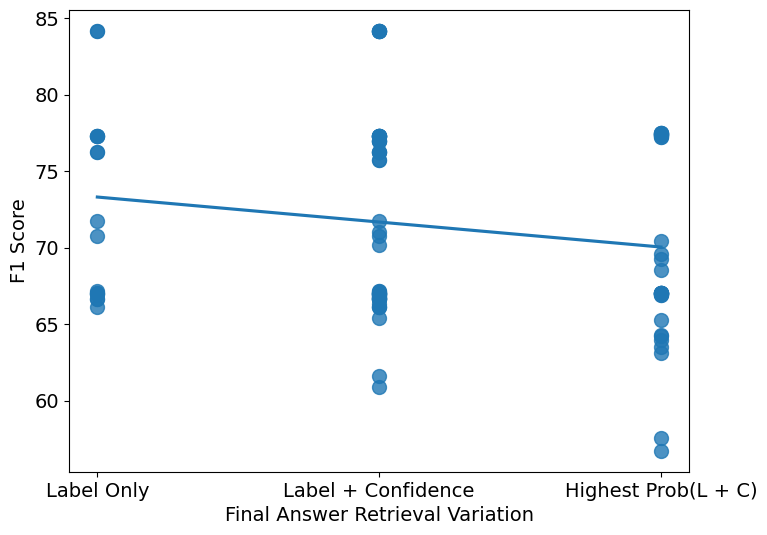

In [12]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 6))
sns.regplot(x='VA', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Final Answer Retrieval Variation', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

plt.xticks([1, 2, 3], ['Label Only', 'Label + Confidence', 'Highest Prob(L + C)'])

plt.savefig('regplot_va_f1.png', dpi=300, bbox_inches='tight')
plt.show()

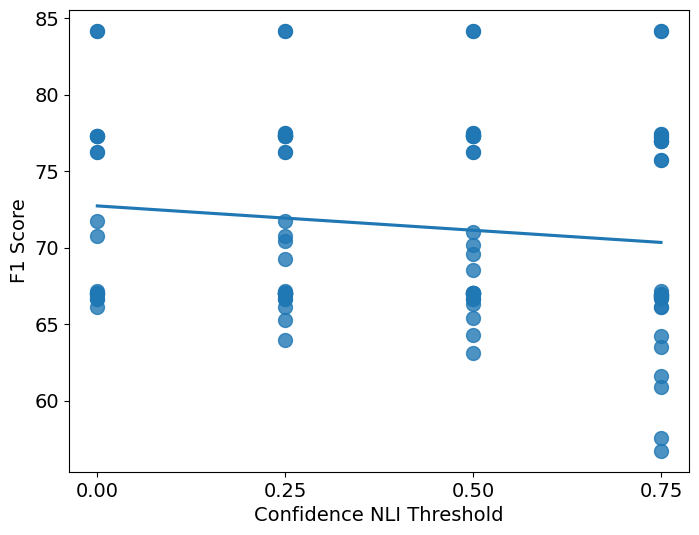

In [13]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 6))
sns.regplot(x='TH', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Confidence NLI Threshold', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

plt.xticks([0.0, 0.25, 0.5, 0.75])

plt.savefig('regplot_th_f1.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
data_ts = pd.read_csv('ts_experiment.csv')
#data_ts.replace('BL', 0, inplace=True)
data_ts = data_ts[data_ts['MSC'] != 'Baseline']

def convert_to_float(value):
    try:
        return float(value.replace(',', '.')) if isinstance(value, str) and value != '#DIV/0!' else float(value)
    except ValueError:
        return 0

data_ts.loc[:, data_ts.columns.difference(['Dataset', 'MSC'])] = data_ts.loc[:, data_ts.columns.difference(['Dataset', 'MSC'])].applymap(convert_to_float)

int_column = ['TQ', 'TS', 'MSI', 'VA', 'RA', 'RR', 'WA', 'WR']
data_ts[int_column] = data_ts[int_column].astype(int)

data_ts

,Dataset,MSC,TQ,TS,MSI,VA,TH,EM,F1,RA,RR,WA,WR
1,idkmrc,indonli_mnli_idkmrc-nli,1,1,1,2,0.75,71.44550,78.45857,586,54,152,52
2,idkmrc,indonli_mnli_idkmrc-nli,1,2,1,2,0.75,71.68246,78.79067,590,50,155,49
3,idkmrc,indonli_mnli_idkmrc-nli,1,3,1,2,0.75,73.81517,81.11026,611,29,172,32
4,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.75,75.94787,84.16834,639,1,198,6
5,idkmrc,indonli_mnli_idkmrc-nli,1,5,1,2,0.75,74.76303,82.35951,620,20,179,25
6,idkmrc,indonli_mnli_idkmrc-nli,1,6,1,2,0.75,65.63981,70.14204,540,100,130,74
7,idkmrc,indonli_mnli_idkmrc-nli,1,7,1,2,0.75,67.06161,72.80594,551,89,136,68
8,idkmrc,indonli_mnli_idkmrc-nli,1,8,1,2,0.75,55.56872,58.81457,449,191,100,104
10,tydiqaid,indonli_mnli_tydiqaid-nli,1,1,2,3,0.50,57.30994,73.35205,483,41,276,55
11,tydiqaid,indonli_mnli_tydiqaid-nli,1,2,2,3,0.50,57.30994,73.27496,483,41,275,56


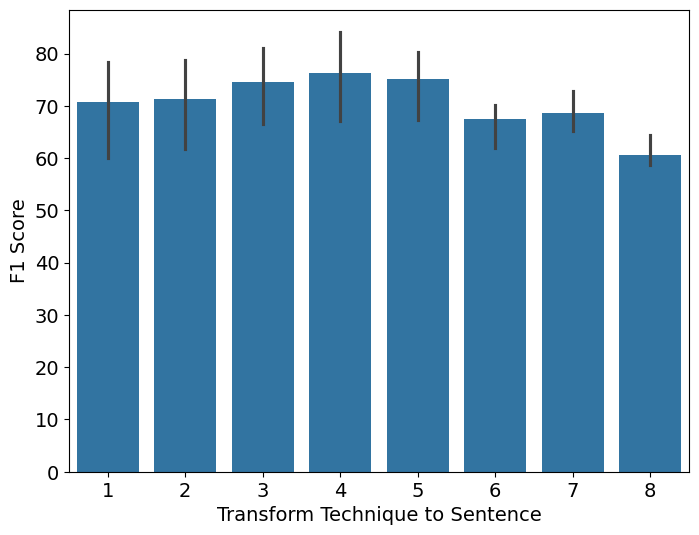

In [16]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 6))
sns.barplot(x='TS', y='F1', data=data_ts)
plt.xlabel('Transform Technique to Sentence', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

plt.savefig('barplot_ts_f1.png', dpi=300, bbox_inches='tight')
plt.show()